In [97]:
from fastai.tabular.all import *

# Load the csv
df = pd.read_csv('./date_hood_thefts_filled.csv',
                 names=["date", "hood_id", "thefts"])
df.head()


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [98]:
# Transform the date column to a datetime object
make_date(df, 'date')
df.head()


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [99]:
# Feature engineer the date column
add_datepart(df, 'date')
df.head()

,hood_id,thefts,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
1,1,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
2,2,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
3,3,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
4,4,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09


In [100]:
# Create a data frame that only has thefts set to 0
df_0 = df[df['thefts'] == 0]

# Create a data frame where thefts are not 0
df_not_0 = df[df['thefts'] != 0]

# Create a dataframe merging df_not_0 and part of df_0
df_0 = df_0.sample(frac=0.4)
df = pd.concat([df_not_0, df_0])

# Sort the dataframe by date
df = df.sort_values(by=['Elapsed'])

df[:40]

,hood_id,thefts,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
95,95,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
8,8,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
15,15,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
55,55,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
144,144,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
94,94,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
27,27,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
102,102,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
158,158,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
17,17,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09


In [101]:
# Split the data into train and validation sets where the end of the set is the validation set
splits = EndSplitter(valid_pct=0.2, valid_last=True)(range_of(df))

# Create a TabularPandas object
tabular_pandas = TabularPandas(
    df, procs=[Categorify, Normalize],
    cat_names=["hood_id", "Month", "Week", "Day", "Dayofweek", "Dayofyear", "Is_month_end",
               "Is_month_start", "Is_quarter_end", "Is_quarter_start", "Is_year_end", "Is_year_start"],
    cont_names=["Year"],
    y_names="thefts", y_block=CategoryBlock,
    splits=splits)

tabular_pandas.xs.iloc[:5]


,hood_id,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Year
95,96,1,1,1,4,1,1,2,1,2,1,2,-1.474515
8,9,1,1,1,4,1,1,2,1,2,1,2,-1.474515
15,16,1,1,1,4,1,1,2,1,2,1,2,-1.474515
55,56,1,1,1,4,1,1,2,1,2,1,2,-1.474515
144,145,1,1,1,4,1,1,2,1,2,1,2,-1.474515


In [102]:
# Set the batch size
data_loader = tabular_pandas.dataloaders(bs=500)
data_loader.show_batch()

,hood_id,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Year,thefts
0,66,9,37,13,3,256,False,False,False,False,False,False,2018.0,1
1,96,10,41,8,0,281,False,False,False,False,False,False,2018.0,0
2,158,5,19,10,6,131,False,False,False,False,False,False,2020.0,0
3,139,12,51,18,4,352,False,False,False,False,False,False,2015.0,0
4,145,8,31,5,6,217,False,False,False,False,False,False,2018.0,0
5,1,2,7,12,3,43,False,False,False,False,False,False,2015.0,2
6,119,2,8,25,6,56,False,False,False,False,False,False,2018.0,0
7,60,4,15,16,6,106,False,False,False,False,False,False,2017.0,0
8,13,10,42,16,1,289,False,False,False,False,False,False,2018.0,0
9,69,10,43,29,5,303,False,False,False,False,False,False,2016.0,0


In [103]:
# Create a model with cross entropy loss
learn = tabular_learner(data_loader, loss_func=FocalLossFlat(), metrics=accuracy)


In [104]:
# Train the model
learn.fit_one_cycle(5)


epoch,train_loss,valid_loss,accuracy,time
0,0.504710,0.640320,0.329572,00:09
1,0.225426,0.271314,0.574577,00:07
2,0.221111,0.224311,0.750539,00:08
3,0.214451,0.225134,0.738818,00:07
4,0.208894,0.227401,0.732400,00:07


In [105]:
# Show the results
learn.show_results(max_n=100, shuffle=True)


,hood_id,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Year,thefts,thefts_pred
0,31.0,3.0,11.0,15.0,2.0,74.0,1.0,1.0,1.0,1.0,1.0,1.0,2.622102,1.0,0.0
1,133.0,7.0,26.0,4.0,7.0,185.0,1.0,1.0,1.0,1.0,1.0,1.0,2.036871,0.0,0.0
2,114.0,2.0,5.0,4.0,4.0,35.0,1.0,1.0,1.0,1.0,1.0,1.0,2.036871,0.0,0.0
3,23.0,7.0,26.0,4.0,7.0,185.0,1.0,1.0,1.0,1.0,1.0,1.0,2.036871,0.0,0.0
4,72.0,1.0,4.0,25.0,2.0,25.0,1.0,1.0,1.0,1.0,1.0,1.0,2.622102,0.0,0.0
5,38.0,1.0,4.0,29.0,6.0,29.0,1.0,1.0,1.0,1.0,1.0,1.0,2.622102,0.0,0.0
6,54.0,8.0,32.0,10.0,2.0,222.0,1.0,1.0,1.0,1.0,1.0,1.0,2.036871,0.0,0.0
7,54.0,3.0,12.0,24.0,4.0,83.0,1.0,1.0,1.0,1.0,1.0,1.0,2.622102,0.0,0.0
8,106.0,3.0,10.0,12.0,6.0,71.0,1.0,1.0,1.0,1.0,1.0,1.0,2.622102,0.0,0.0
9,55.0,4.0,14.0,5.0,1.0,95.0,1.0,1.0,1.0,1.0,1.0,1.0,2.036871,0.0,0.0


In [106]:
# Get the predictions and target values
preds, targs = learn.get_preds()
print(preds)
print(targs)


tensor([[5.9087e-01, 3.7247e-01, 3.4271e-02, 1.9075e-03, 4.0055e-04, 7.9708e-05],
        [5.8625e-01, 3.6609e-01, 4.4257e-02, 2.3982e-03, 8.2765e-04, 1.7370e-04],
        [5.3874e-01, 4.0060e-01, 5.5819e-02, 3.7501e-03, 9.0287e-04, 1.8889e-04],
        ...,
        [5.5091e-01, 4.1592e-01, 2.8682e-02, 2.8629e-03, 1.4291e-03, 1.8746e-04],
        [4.4647e-01, 4.8644e-01, 5.9464e-02, 5.1919e-03, 2.1640e-03, 2.7277e-04],
        [4.5364e-01, 4.5880e-01, 7.9450e-02, 6.1016e-03, 1.7873e-03, 2.1335e-04]])
tensor([[0],
        [1],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=torch.int8)


In [107]:
# Get the highest value from the predictions tensor
preds = preds.argmax(dim=-1)
print(preds)

tensor([0, 0, 0,  ..., 0, 1, 1])


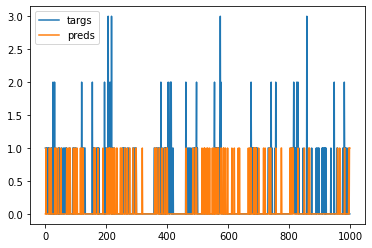

In [108]:
# Plot only the highest predictions vs target in a line plot las 4000 values
plt.plot(targs[-1000:].numpy(), label='targs')
plt.plot(preds[-1000:].numpy(), label='preds')
plt.legend()
plt.show()

In [109]:
# With sckiit-learn calculate the mean squared error and accuracy
from sklearn.metrics import mean_squared_error, accuracy_score

# Round the predictions to the nearest integer
preds = np.round(preds)

print('Mean squared error: ', mean_squared_error(targs, preds))
print('Accuracy: ', accuracy_score(targs, preds))

Mean squared error:  0.3240742983072191
Accuracy:  0.7324001646768218


In [110]:
# Export the model
learn.export('74_fill_imbalance.pkl')